# Лабораторная работа №2

**Тема**: "Линейная искусственная нейронная сеть. Адаптивный шаг обучения."

**Цель работы**: Изучить обучение и функционирование линейной ИНС с применением адаптивного шага.

**Условие:**

1. Выбор адаптивного шага обучения

Для ускорения процедуры обучения градиентного спуска, вместо постоянного шага обучения можно использовать адаптивный шаг обучения $\alpha(t)$. Назовем <u>адаптивным шагом обучения</u> такой шаг, который целенаправленно выбирается на каждом этапе алгоритма таким образом, чтобы минимизировать среднеквадратичную ошибку сети.

Рассмотрим линейную нейронную сеть, которая состоит из распределительного слоя нейронных элементов и выходного слоя

**Ход работы:**

     a = 1.000000000000       - parametr for function y
     b = 9.000000000000       - parametr for function y
     d = 0.500000000000       - parametr for function y
     L = 4                    - numbers of inputs NN
    Em = 0.000001000000       - minimal squared error
     T = 0.500000000000       - Threshold
     m = 30                   - number of training iterations
    m2 = 15                   - number of forecasting iterations

= = = = = - - - - - Constantly alpha - - - - - = = = = =

w[  0] =       0.007027815745 - weight
w[  1] =       0.002425679707 - weight
w[  2] =       0.009686100884 - weight
w[  3] =       0.009808641469 - weight
e[  0] =       0.500000000000 - etalon value
e[  1] =       1.283326909627 - etalon value
e[  2] =       1.473847630878 - etalon value
e[  3] =       0.927379880234 - etalon value
e[  4] =       0.057479556705 - etalon value
e[  5] =      -0.477530117665 - etalon value
e[  6] =      -0.272764487556 - etalon value
e[  7] =       0.516813900

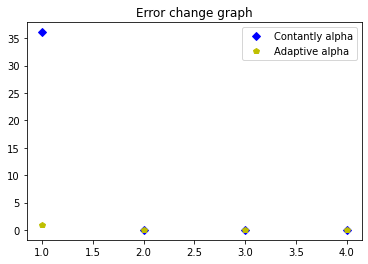

In [3]:
import random
import math
import matplotlib.pyplot as plt

class lab():
	def __init__(self, a, b, d, L, Em, T, m, m2):
		self.a = a
		print("%6s = %-20.12f - parametr for function y" % ("a", self.a))

		self.b = b
		print("%6s = %-20.12f - parametr for function y" % ("b", self.b))

		self.d = d
		print("%6s = %-20.12f - parametr for function y" % ("d", self.d))

		self.L = L
		print("%6s = %-20d - numbers of inputs NN" % ("L", self.L))

		self.Em = Em
		print("%6s = %-20.12f - minimal squared error" % ("Em", self.Em))

		self.T = T
		print("%6s = %-20.12f - Threshold" % ("T", self.T))

		self.m = m
		print("%6s = %-20d - number of training iterations" % ("m", self.m))

		self.m2 = m2
		print("%6s = %-20d - number of forecasting iterations" % ("m2", self.m2))

	def generate_w(self, left_point, right_point):
		self.w = []
		for i in range(self.L):
			self.w.append(random.random() * right_point - left_point)

	def print_w(self):
		for i in range(self.L):
			print("w[%3d] = %20.12f - weight" % (i, self.w[i]))

	def generate_e(self, step):
		self.e = []
		for i in range(self.m + self.m2):
			x = step * i
			result = self.a * math.sin( self.b * x ) + self.d
			self.e.append(result)

	def print_e(self):
		for i in range(self.m + self.m2):
			print("e[%3d] = %20.12f - etalon value" % (i, self.e[i]))

	def WidrowHoffAlgorithm_constAlpha(self, alpha):
		print("| %20s | %20s |" % ("Eras", "E"))
		print("| %16s | %16s |" % ("--------------------", "--------------------"))

		eras = 0
		valueXforGraph = []
		valueYforGraph = []
		while 1:
			E = 0
			for i in range(self.m - self.L):
				y1 = 0
				for j in range(self.L):
					y1 += self.w[j] * self.e[i + j]
				y1 -= self.T
				for j in range(self.L):
					self.w[j] -= alpha * (y1 - self.e[i + self.L]) * self.e[i + j]
				self.T += alpha * (y1 - self.e[i + self.L])
				E += 0.5 * math.pow( (y1 - self.e[i + self.L]), 2 )

			eras += 1
			print("| %20d | %20.12f |" % (eras, E))
			valueXforGraph.append(eras)
			valueYforGraph.append(E)

			if E < self.Em:
				break
		plt.plot(valueXforGraph, valueYforGraph, 'Db', label="Contantly alpha")

	def WidrowHoffAlgorithm_adaptiveAlpha(self, alpha):
		print("| %20s | %20s |" % ("Eras", "E"))
		print("| %16s | %16s |" % ("--------------------", "--------------------"))

		eras = 0
		valueXforGraph = []
		valueYforGraph = []
		while 1:
			E = 0
			for i in range(self.m - self.L):

				x2 = 0
				for q in range(self.L):
					x2 += pow(self.e[i + q], 2)
				alpha = 1 / (1 + x2)

				y1 = 0
				for j in range(self.L):
					y1 += self.w[j] * self.e[i + j]
				y1 -= self.T
				for j in range(self.L):
					self.w[j] -= alpha * (y1 - self.e[i + self.L]) * self.e[i + j]
				self.T += alpha * (y1 - self.e[i + self.L])
				E += 0.5 * math.pow( (y1 - self.e[i + self.L]), 2 )

			eras += 1
			print("| %20d | %20.12f |" % (eras, E))
			valueXforGraph.append(eras)
			valueYforGraph.append(E)

			if E < self.Em:
				break
		plt.plot(valueXforGraph, valueYforGraph, 'py', label="Adaptive alpha")

	def printResult(self):
		def print_headTable():
			print("| %20s | %20s | %20s | %20s |" % (
				"y[]",
				"Эталонное значение",
				"Полученное значение",
				"Отклонение"
			))
			print("| %16s | %16s | %16s | %16s |" % (
				"--------------------",
				"--------------------",
				"--------------------",
				"--------------------"
			))

		trainingSample = []
		print("Result learning")
		print_headTable()
		for i in range(self.m):
			trainingSample.append(0)
			for j in range(self.L):
				trainingSample[i] += self.w[j] * self.e[j + i]
			trainingSample[i] -= self.T
			print("| %20d | %20.12f | %20.12f | %20.12f |" % (
				i,
				self.e[i + self.L],
				trainingSample[i],
				math.pow(self.e[i + self.L] - trainingSample[i], 2)
			))

		print("Results forecasting")
		print_headTable()
		for i in range(self.m2):
			trainingSample.append(0)
			for j in range(self.L):
				trainingSample[i + self.m] += self.w[j] * self.e[self.m - self.L + j + i]
			trainingSample[i + self.m] -= self.T
			print("| %20d | %20.12f | %20.12f | %20.12f |" % (
				i + self.m,
				self.e[i + self.m],
				trainingSample[i + self.m],
				math.pow(self.e[i + self.m] - trainingSample[i + self.m], 2)
			))

"""Main"""

x = lab(
	1,		# a argument for function y
	9,		# b argument for function y
	0.5,	# d argument for function y
	4,		# L number of inputs NN
	1e-6,	# Em argument for algorithm
	0.5,	# T argument for algorithm
	30,		# m number of operations for training results
	15,		# m2 numper of operation for forecasting results
)

print("\n= = = = = - - - - - Constantly alpha - - - - - = = = = =\n")

x.generate_w(0.01, 0.02) # arguments (left_point, right_point)
x.print_w()

x.generate_e(0.1) # argument (step) for y
x.print_e()

x.WidrowHoffAlgorithm_constAlpha(0.5) # argument (alpha)
x.printResult()

print("\n= = = = = - - - - - Adaptive alpha - - - - - = = = = =\n")

x.generate_w(0.01, 0.02) # arguments (left_point, right_point)
x.print_w()

x.generate_e(0.1) # argument (step) for y
x.print_e()

x.WidrowHoffAlgorithm_adaptiveAlpha(0.5) # argument (alpha)
x.printResult()

plt.title("Error change graph") # Python write title in graph
plt.legend() # Python write legend in graph
plt.show() # Python open new windows and show graph


**Вывод**: "Изучили обучение и функционирование линейной ИНС с применением адаптивного шага."